<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
from scipy.stats import entropy
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np
import matplotlib as plt

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
plt.rcParams.update({'font.size': 25})

<h1>Areas where similarity measures agree (based on std) there is high similarity</h1>

In [5]:
measures = [sim.pearson_correlation_abs, sim.mutual_information, comp.invert(sim.manhattan_distance)]

In [6]:
measure_labels = ["Absolute Pearson's Correlation", "Mutual Information", "Manhattan Distance (Inverted)"]

In [7]:
print(plots.plot_agreement_areas_defined_with.__doc__)


    Plot areas where the similarity measures agree on the dependencies.
    Contains the following steps:
        1. Compute similarity between reference series and map with every similarity measure
        2. Combine the similarity maps into two summary maps:
            - Combine using np.mean to get a summary value for the similarity measures
            - Combine using agreement_func to get an agreement value for the similarity measures
        3. Filter the maps using their respective thresholds
        4. Plot map containing ones(point has satisfied both conditions) and zeros(not satisfied at least one condition).
        5. Repeat 3-4 for every combination of value thresholds and agreement thresholds

    Before the values are combined (Step 2), they are scaled with the scaling_func to make value ranges combinable.
    Pearson's Correlation will not be scaled.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        referenc

In [8]:
agreement_func = np.std #Standard Deviation

In [9]:
value_thresholds = [0.5, 0.55, 0.6, 0.65]

In [10]:
agreement_thresholds = [1, 0.1, 0.01, 0.001]

In [11]:
print(comp.binning_values_to_quantiles.__doc__)


    Convert a map of values into n percentile bins.

    Each value on the map is replaced with the percentage bin it belongs to.
    0.3 means this value belongs to the 20%-30% bin which contains the 20%-30%
    smallest values of the map.

    All the bins have the same size

    Args:
        map_array (array): Map with values to scale
        num_bins (int): Number or bins

    Returns:
        Map with the bin numbers for each value
    


In [12]:
scaling = comp.binning_to_100_bins

C:\Users\tousp\Climate-Similarity-Metrics\plots.py:726: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


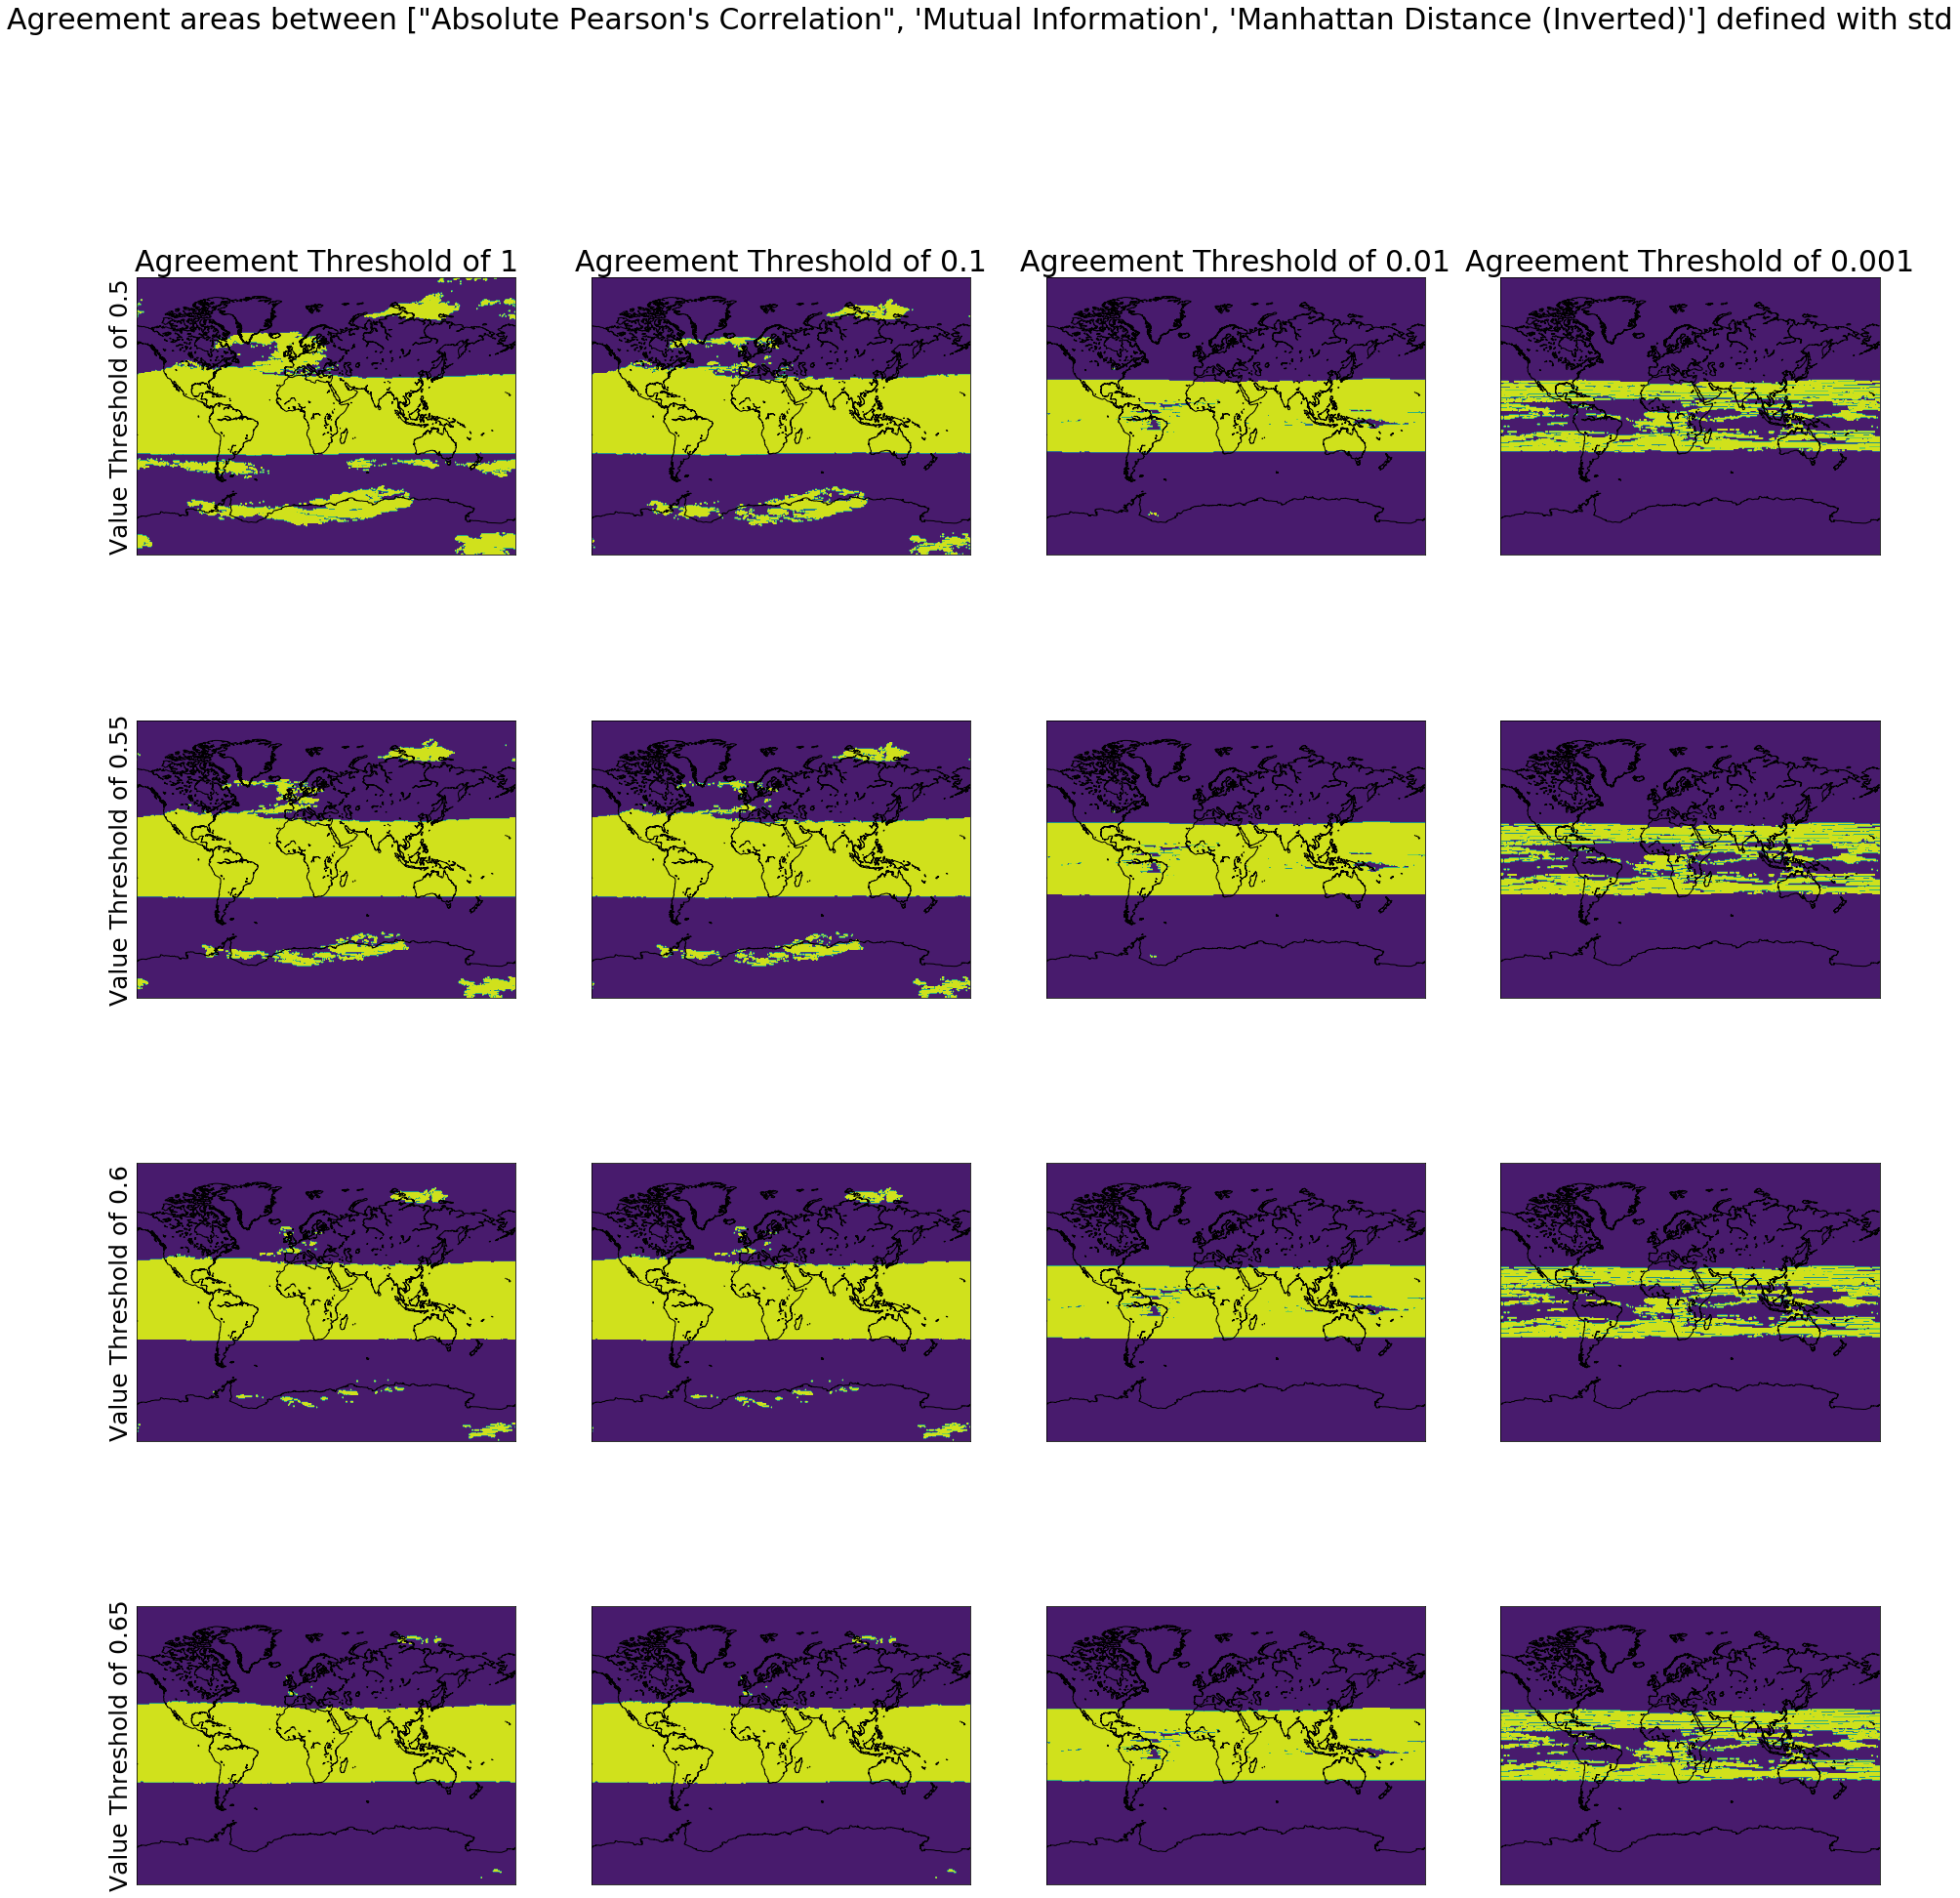

In [13]:
plots.plot_agreement_areas_defined_with(u_l30, qbo_equator, measures, measure_labels, agreement_func, value_thresholds, agreement_thresholds, scaling_func=scaling)

<h1>Areas where similarity measures agree (based on std) there is low similarity</h1>

Add the optional argument filter_values_high=False, so the value get filtered low

In [14]:
value_thresholds = [0.5, 0.4, 0.3, 0.2]

In [15]:
agreement_thresholds = [0.4, 0.2, 0.1, 0.05]

In [ ]:
plots.plot_agreement_areas_defined_with(u_l30, qbo_equator, measures, measure_labels, agreement_func, value_thresholds, agreement_thresholds, filter_values_high=False, scaling_func=scaling)

<h1>Same procedure, but with entropy</h1>

In [ ]:
agreement_func = entropy

In [ ]:
value_thresholds = [0.6, 0.7, 0.8, 0.9]

In [ ]:
agreement_thresholds = [0.7, 0.8, 0.9, 1.0]

As higher entropy means, more similarity, we have to set filter_agreement_high to True

In [ ]:
plots.plot_agreement_areas_defined_with(u_l30, qbo_equator, measures, measure_labels, agreement_func, value_thresholds, agreement_thresholds, filter_agreement_high=True)